<a href="https://colab.research.google.com/github/taraudani/wrangling-FORK/blob/main/Analytics_I_Wrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
from google.colab import files #importing csv file directly to notebook
uploaded = files.upload()

Saving airbnb_hw.csv to airbnb_hw.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('airbnb_hw.csv')

In [4]:
#1

df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True) #removing characters from numeric values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #converting column to numeric, making errors NaN
df['Price'].dropna() #removing NaN values

missing_values = df['Price'].isnull().sum()
print(f"Number of missing values in 'Price': {missing_values}")

Number of missing values in 'Price': 0


In [5]:
from google.colab import files #importing csv file directly to notebook
uploaded = files.upload()

Saving mn_police_use_of_force.csv to mn_police_use_of_force.csv


In [6]:
df1 = pd.read_csv('mn_police_use_of_force.csv')

In [7]:
#2

df1['subject_injury'].value_counts(dropna=False)

#this shows us that the majority of values are missing for the subject injury category (9848/12925, or ~76%)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [8]:
missing_data = df1[df1['subject_injury'].isna()]

missing_force_type_distribution = missing_data['force_type'].value_counts()
print(missing_force_type_distribution)

#This tells us how many of the NaN values correspond with each force type. We can see that the majority of unreported subject injuries were bodily force, which tells us that police officers may be intentionally witholding information if they caused the subject harm.
#I would say this is a concern because physical aggression may be a larger issue than we know between police officers and subjects.

force_type
Bodily Force                   7051
Chemical Irritant              1421
Taser                           985
Maximal Restraint Technique     170
Less Lethal                      87
Improvised Weapon                74
Police K9 Bite                   31
Gun Point Display                27
Baton                             2
Name: count, dtype: int64


In [9]:
#dropping na values to clean subject_injury variable
df1['subject_injury'].dropna()

,subject_injury
9,No
10,No
11,Yes
12,Yes
13,Yes
...,...
4932,Yes
4934,Yes
4936,No
4937,No


In [10]:
from google.colab import files #importing csv file directly to notebook
uploaded = files.upload()

Saving justice_data.parquet to justice_data.parquet


In [11]:
df2 = pd.read_parquet('justice_data.parquet')

In [12]:
#3

#replacing all unknown values with 'Unknown'
df2['WhetherDefendantWasReleasedPretrial'] = df2['WhetherDefendantWasReleasedPretrial'].replace({None: 'Unknown'})

In [13]:
#4

df2['ImposedSentenceAllChargeInContactEvent'].nunique() #counting number of unique values
df2['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df2['ImposedSentenceAllChargeInContactEvent'], errors='coerce') #converting all values to numeric, replacing unknown values with NaN
df2['ImposedSentenceAllChargeInContactEvent'].dropna() #dropping NaN values

#this puts the values all into the same numeric format, and drops na values for ease of reading


,ImposedSentenceAllChargeInContactEvent
1,60.000000
2,12.000000
3,0.985626
5,12.000000
6,36.000000
...,...
22964,12.000000
22968,0.000000
22973,3.000000
22974,24.000000


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [106]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xls to GSAF5 (1).xls


In [127]:
#2

shark = pd.read_excel('GSAF5.xls')
shark1 = shark.dropna(axis=1, how='all')

shark1

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [109]:
#3

shark1['Year'].nunique()
shark1['Year'] = pd.to_numeric(shark1['Year'], errors='coerce') #converting all values to numeric

#The values are now all numeric in years down to the 1500s, but after that they become 0 if the year was only known to be before a certain time or was reported through a pictograph/non-specific event

shark1940 = shark1[shark1['Year'] >= 1940]
shark1940 = shark1940.sort_values(by='Year')
attacks_per_year = shark1940.groupby('Year').size().reset_index(name='number_of_attacks')
for index, row in attacks_per_year.iterrows():
    print(f"Year: {row['Year']}, Number of Attacks: {row['number_of_attacks']}")

#The number of attacks seems to be increasing over time, especially into the 2000s


Year: 1940.0, Number of Attacks: 24.0
Year: 1941.0, Number of Attacks: 27.0
Year: 1942.0, Number of Attacks: 41.0
Year: 1943.0, Number of Attacks: 28.0
Year: 1944.0, Number of Attacks: 31.0
Year: 1945.0, Number of Attacks: 16.0
Year: 1946.0, Number of Attacks: 26.0
Year: 1947.0, Number of Attacks: 30.0
Year: 1948.0, Number of Attacks: 29.0
Year: 1949.0, Number of Attacks: 31.0
Year: 1950.0, Number of Attacks: 43.0
Year: 1951.0, Number of Attacks: 32.0
Year: 1952.0, Number of Attacks: 29.0
Year: 1953.0, Number of Attacks: 36.0
Year: 1954.0, Number of Attacks: 45.0
Year: 1955.0, Number of Attacks: 43.0
Year: 1956.0, Number of Attacks: 51.0
Year: 1957.0, Number of Attacks: 41.0
Year: 1958.0, Number of Attacks: 54.0
Year: 1959.0, Number of Attacks: 93.0
Year: 1960.0, Number of Attacks: 93.0
Year: 1961.0, Number of Attacks: 78.0
Year: 1962.0, Number of Attacks: 86.0
Year: 1963.0, Number of Attacks: 61.0
Year: 1964.0, Number of Attacks: 66.0
Year: 1965.0, Number of Attacks: 51.0
Year: 1966.0

Text(0.5, 1.0, 'Age of Shark Attack Victims')

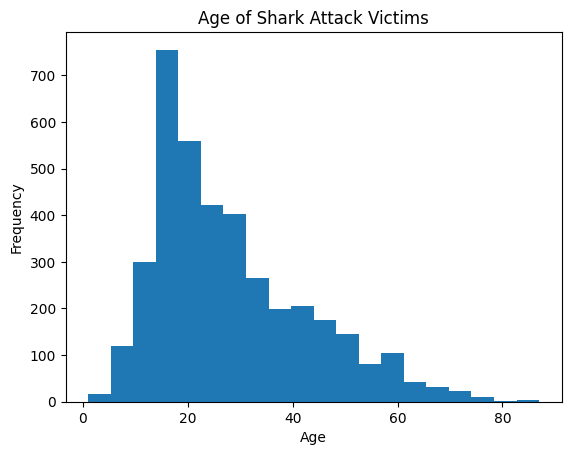

In [110]:
#4

shark1['Age'].nunique()
shark1['Age'] = pd.to_numeric(shark1['Age'], errors='coerce') #converting all values to numeric
shark1 = shark1.dropna(subset=['Age'])

plt.hist(shark1['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of Shark Attack Victims')

In [111]:
#5

shark1['Sex'] = shark1['Sex'].str.strip().str.upper() #cleaning sex column

male_proportion = shark1[shark1['Sex'] == 'M'].shape[0] / shark1.shape[0] #to get male proportion
print(f"Proportion of male victims: {male_proportion:.2%}")

Proportion of male victims: 84.54%


In [112]:
#6

shark1['Type'].unique() #checking for unique value names

shark1['Type'] = shark1['Type'].str.strip().str.lower() #standardize column based on unique names
shark1['Type'] = shark1['Type'].replace({
    'provoked': 'Provoked',
    'unprovoked' : 'Unprovoked',
    'unconfirmed' : 'Unknown',
    'questionable' : 'Unknown',
    'watercraft' : 'Unknown',
    'sea disaster': 'Unknown',
    '?' : 'Unknown',
    'unverified': 'Unknown',
    'invalid': 'Unknown',
    'under investigation': 'Unknown',
    'boat': 'Unknown',
    'unknown': 'Unknown'
})

unprovoked_attacks = shark1[shark1['Type'] == 'Unprovoked'].shape[0] #proportion of unprovoked attacks
total_victims = shark1.shape[0]
proportion_unprovoked = unprovoked_attacks / total_victims
print(proportion_unprovoked)

0.8319088319088319


In [116]:
#7

print(shark1['Fatal Y/N'].unique()) #get unique values

shark1 = shark1.dropna()
shark1['Fatal Y/N'] = shark1['Fatal Y/N'].str.strip().str.upper() #standardize column
shark1['Fatal Y/N'] = shark1['Fatal Y/N'].replace({
    'Y': 'Y',
    'N': 'N',
    'F': 'Unknown',
    'M': 'Unknown',
    'n': 'N',
    'Nq': 'Unknown',
    'NQ': 'Unknown',
    'Y X 2': 'Y',
    'Y x 2': 'Y',
    ' N': 'N',
    'N ': 'N',
    'y': 'Y',
    'Unknown': 'Unknown',
    'UNKNOWN': 'Unknown',
    'nan': 'Unknown'
    })

['N' 'Y' 'Unknown' nan]


In [134]:
#8

fatal_by_type = shark1.groupby(['Type', 'Fatal Y/N']).size().unstack() #by type
print(fatal_by_type)

fatal_by_gender = shark1.groupby(['Sex', 'Fatal Y/N']).size().unstack() #by gender
print(fatal_by_gender)

#Shark attacks were more likely to occur to men than women, and they also seemed to be more fatal for men than women.
#I think that sharks are misunderstood creatures but can still be very scary to encounter in the wild. I wouldn't want to see one but I also don't think they're as mean as people say.

Fatal Y/N            2017    N    F    M       N   N    Nq  UNKNOWN       Y  \
Type                                                                          
 Provoked             NaN  NaN  NaN  NaN     1.0  NaN  NaN      NaN     1.0   
?                     NaN  NaN  NaN  NaN     1.0  NaN  NaN      NaN     NaN   
Boat                  NaN  NaN  NaN  NaN     7.0  NaN  NaN      NaN     NaN   
Invalid               NaN  NaN  NaN  NaN    17.0  NaN  NaN      1.0     8.0   
Provoked              1.0  2.0  NaN  1.0   605.0  NaN  NaN      3.0    20.0   
Questionable          NaN  NaN  2.0  NaN    14.0  NaN  NaN      NaN     4.0   
Sea Disaster          NaN  NaN  NaN  NaN    67.0  NaN  NaN      1.0   169.0   
Under investigation   NaN  NaN  NaN  NaN     1.0  NaN  NaN      NaN     NaN   
Unprovoked            NaN  5.0  2.0  1.0  3817.0  1.0  1.0     57.0  1251.0   
Unverified            NaN  NaN  NaN  NaN     1.0  NaN  NaN      NaN     NaN   
Watercraft            NaN  NaN  NaN  NaN   332.0  Na

In [133]:
#9
shark1['Species '] = shark1['Species '].str.upper() #cleaning and checking for white shark
white_shark_attacks = shark1[shark1['Species '].str.contains('WHITE SHARK', na=False)]

white_shark_proportion = white_shark_attacks.shape[0] / shark1.shape[0] #calculating proportion
print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")

Proportion of attacks by white sharks: 10.01%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
**The most recent census asked people to select a checkbox from a set list of races, with an option for 'Other', and a question about Hispanic origin.**

2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

**We gather this data because we are trying to see how different things affect different groups of people and role that race can play in inequalities. We can use this data to see the median income of White versus Black people or the general grouping/living areas of different races. Data quality matters because this data is predicting problems that may need to be solved and accuracy is important to that.**

3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

**The census did a good job of providing another option if you were multiracial or did not fit the predefined categories for race, however, I think that a lot of those categories that are not first defined should be permanent. It is rare to see middle-eastern as an option, and Asian encompasses South and East Asia which are two very different places ethnically, and socially. Future surveys could include the ten most popular ethnicities and have more specific options within those ethnicities as well. African American and African are both considered Black but both also have very different backgrounds and lifestyles. It would be helpful to have more specific options just generally.**

4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

**The 2020 census only included options for male and female when it came to sex. This is interesting because of the growing divide between sex (assigned ar birth) and gender (how you identify). This also disregards the thousands of people who don't necessarily identify as male or female. In the future it may be helpful to have a section for gender assigned at birth, and then a section for gender identity which includes nonbinary, both, other, or a write in. Both sections should also have an option to not answer the question.**

5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

**Because we are groing to accept that there can be many different types of genders and a diverse group of races, this makes it harder to clean data because of the differences and the different terms. Sometimes there are two words for the same thing that may need to be grouped together, and overall the more categories there are, the more complicated this becomes, especially if people refrain from answering. It might be good to adopt a full list of options so at least the same term is used, and the last option can be other for continuity.**

6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**This could expose people for things they may not want to be shared with the world, so privacy is the main concern. If someone is transgender they may not want employers or other people knowing that for fear of discrimination. Likewise, if someone is a certain race they may not want the public to explicitly know. Additionally, there could eb risks of overgeneralization and saying that someone is a certain race because of where they live. This is private data that people likely don't want to be exposed and could create prejudice against them. That is the main concern.**